# H&E image segmentation

This notebook demonstrates how to use a trained pytorch segmentation model to an input H&E image. Let's get started!

Import dependencies and MicroQuant functions.

In [1]:
import microquant
import numpy as np
import os
import matplotlib.pyplot as plt
import yaml

import aicspylibczi
import tifffile as tf

%matplotlib notebook

First, select some H&E image data you want to process with the trained modell. If you do not have samples available,you can download an example from here: https://rodare.hzdr.de/

In [2]:
filename = r'E:\BiAPoL\Projects\MicroQuant\data\N182c_SAS_14_2_181210-Scene-1-ScanRegion0_HE.czi'

Load and visualize the input data in low resolution:

In [3]:
Image = aicspylibczi.CziFile(filename)
Image = Image.read_mosaic(C = 0, scale_factor=0.125)[0]

<IPython.core.display.Javascript object>


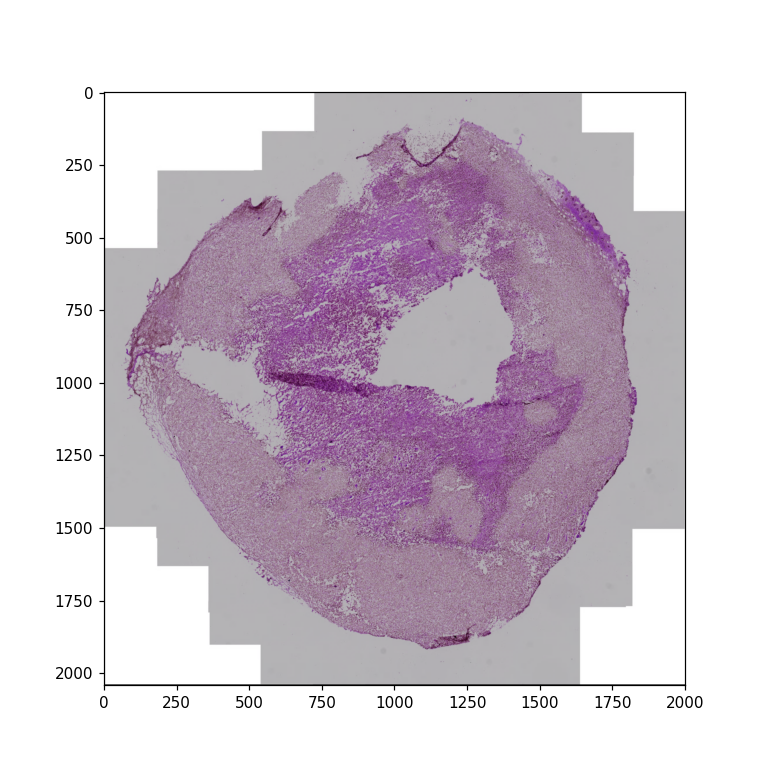

In [4]:
plt.figure(figsize=(7,7))
plt.imshow(Image)

## Load segmentation model
To run the segmentation, it is necessary to import a trained segmentation model.

In [5]:
source = r'E:\Promotion\Projects\2021_Necrotic_Segmentation\data\Experiment_20210713_001952'
param_file = os.path.join(source, 'params.yaml')

In [6]:
# read config
with open(param_file, "r") as yamlfile:
    params = yaml.load(yamlfile, Loader=yaml.FullLoader)

    hyperparameters_training = params['Hyperparameters']
    model = os.path.abspath(
        os.path.join(
        os.path.dirname(param_file),
        params['Output']['Best_model'])
    )
    
assert os.path.exists(model)
print('Model:', model)
print(params)

Model: E:\Promotion\Projects\2021_Necrotic_Segmentation\data\Experiment_20210713_001952\model\bst_model256_0.6997.bin
{'Hyperparameters': {'BATCH_SIZE': 31, 'CRITERION': 'CrossEntropyLoss()', 'EPOCHS': 150, 'LEARNING_RATE': 2e-05, 'N_CLASSES': 4, 'PATIENCE': 10}, 'Input': {'IMG_SIZE': 256, 'PIX_SIZE': 2.5}, 'Output': {'Best_model': '.\\model\\bst_model256_0.6997.bin'}}


In [7]:
Segmentation = microquant.segmentation.segment_he(
    input_file=filename,
    model_file=model,
    n_classes=params['Hyperparameters']['N_CLASSES'],
    pxsize=params['Input']['PIX_SIZE'],
    device='cuda',  # put 'cpu' here if no GPU available
    batch_size=30,
    tile_size=256
)

	Pixel size: 2.5
	Patch size: 256
	batch size: 30


	Tilewise forward segmentation...: 100%|█████████████████████████████████████████████| 179/179 [00:34<00:00,  5.13it/s]


	---> Upscaling


Import and display the resulting segmentation image:

<IPython.core.display.Javascript object>


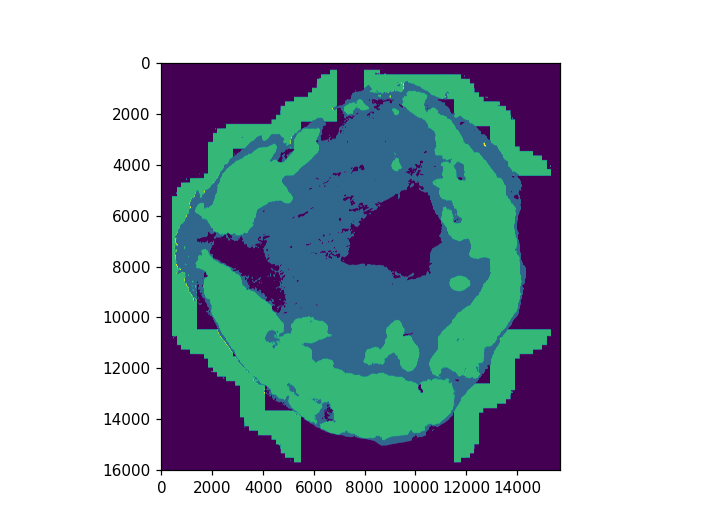

In [8]:
Segmentation = tf.imread(Segmentation)
plt.figure()
plt.imshow(Segmentation)